# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the file name "Anime.csv"
csv_file = "Anime.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame to get a glimpse of the data
print(df.head())

      ID                             Title  \
0  16498                Shingeki no Kyojin   
1   1535                        Death Note   
2   5114  Fullmetal Alchemist: Brotherhood   
3  30276                     One Punch Man   
4  11757                  Sword Art Online   

                                            Synonyms  \
0                                           AoT, SnK   
1                                                 DN   
2  Hagane no Renkinjutsushi Fullmetal Alchemist, ...   
3                  One Punch-Man, One-Punch Man, OPM   
4                                         S.A.O, SAO   

                     Japanese                          English  \
0                       進撃の巨人                  Attack on Titan   
1                       デスノート                       Death Note   
2  鋼の錬金術師 FULLMETAL ALCHEMIST  Fullmetal Alchemist Brotherhood   
3                      ワンパンマン                    One Punch Man   
4                ソードアート・オンライン                 Sword Art 

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

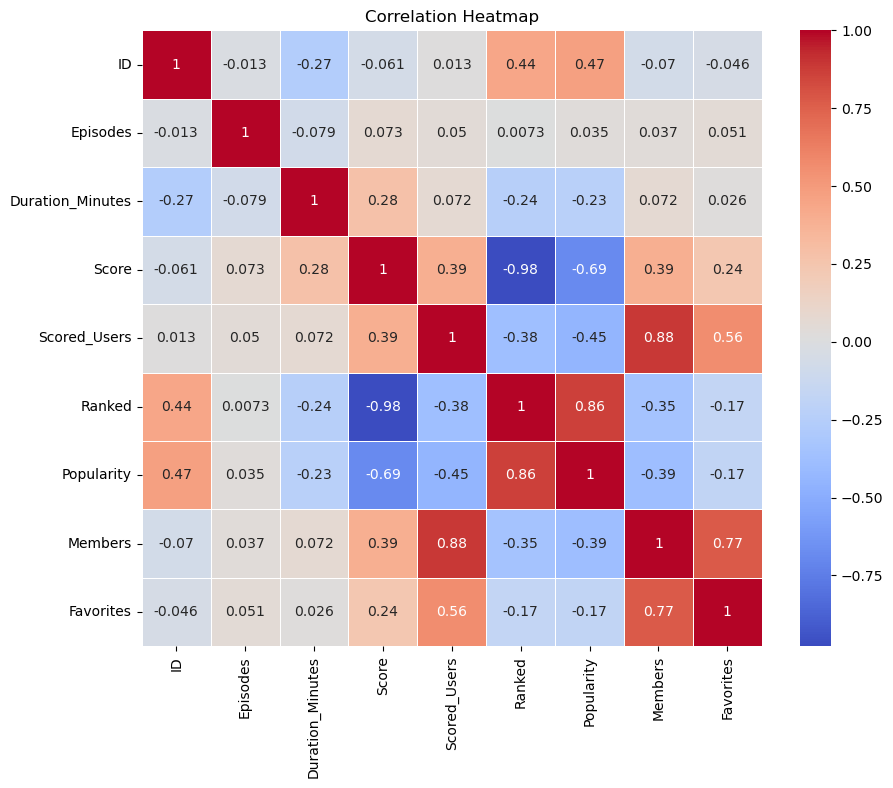

Variables with the strongest positive correlation: ('Scored_Users', 'Members')
Variables with the strongest negative correlation: ('Ranked', 'Score')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the file name "Anime.csv"
csv_file = "Anime.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Calculate the correlation matrix using numeric columns only
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Find the pair with the highest positive correlation
strongest_positive_corr = correlation_matrix.unstack().sort_values(ascending=False)
strongest_positive_corr = strongest_positive_corr[strongest_positive_corr < 1].idxmax()
print("Variables with the strongest positive correlation:", strongest_positive_corr)

# Find the pair with the highest negative correlation
strongest_negative_corr = correlation_matrix.unstack().sort_values()
strongest_negative_corr = strongest_negative_corr[strongest_negative_corr > -1].idxmin()
print("Variables with the strongest negative correlation:", strongest_negative_corr)



## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

Slope: 1.9501038493219263
Intercept: -12425.782312421805


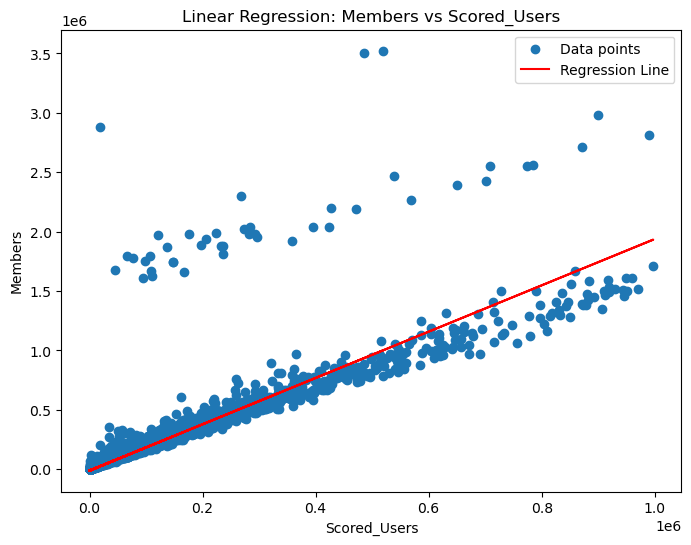

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (Anime.csv in this case)
data = pd.read_csv("Anime.csv")

# Select the columns with the strongest correlation
X = data['Scored_Users']
y = data['Members']

# Calculate the means of X and Y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculate the slope and intercept
numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
slope = numerator / denominator
intercept = mean_y - (slope * mean_x)

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

# Plot the column values and the line produced by the model
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data points')
plt.plot(X, slope * X + intercept, color='red', label='Regression Line')
plt.xlabel(X.name)
plt.ylabel(y.name)
plt.title(f'Linear Regression: {y.name} vs {X.name}')
plt.legend()
plt.show()


## Error Terms

Finally, plot your error terms!

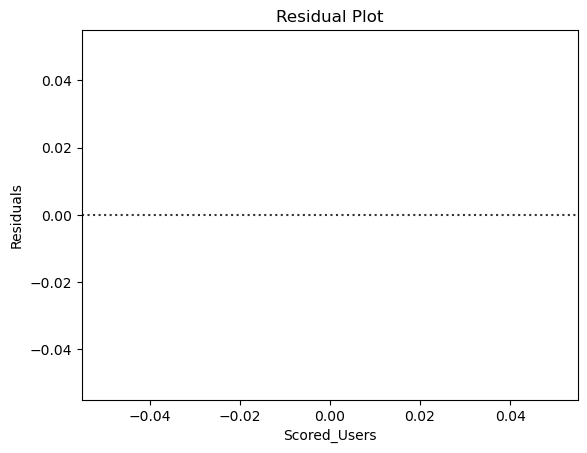

R-squared: 1.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("Anime.csv")

# Select the columns with the strongest correlation
X = data['Scored_Users']
y = data['Members']

# Fit a linear regression model (manually) - calculate coefficients
X_mean = np.mean(X)
y_mean = np.mean(y)
num = 0
den = 0

for i in range(len(X)):
    num += (X[i] - X_mean) * (y[i] - y_mean)
    den += (X[i] - X_mean) ** 2

slope = num / den
intercept = y_mean - (slope * X_mean)

# Make predictions
y_pred = slope * X + intercept

# Calculate residuals (error terms)
residuals = y - y_pred

# Create a residual plot
sns.residplot(x=X, y=residuals, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Scored_Users")
plt.ylabel("Residuals")
plt.show()

# Calculate SSE
SSE = np.sum(residuals ** 2)

# Calculate SST
SST = np.sum((y - y_mean) ** 2)

# Calculate R-squared
R_squared = 1 - (SSE / SST)

# Print the R-squared value
print("R-squared:", R_squared)



## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 1.0
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes i do
3. Was your plot of the error terms a bell curve? No it was not 
